In [17]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-10-17 16:07:49--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-10-17 16:07:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 40s  

2025-10-17 16:10:29 (5.15 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [18]:
import numpy as np
print("Indexing word vectors-100d")

embeddings_index_100d = {}
f = open('glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index_100d[word] = coefs
f.close()

print("Found %s word vectors." % len(embeddings_index_100d))

Indexing word vectors-100d
Found 400000 word vectors.


In [19]:
word1_embedding = embeddings_index_100d['movie']
print("Size of the embeddings:", word1_embedding.shape,"\n")
word1_embedding

Size of the embeddings: (100,) 



array([ 0.38251  ,  0.14821  ,  0.60601  , -0.51533  ,  0.43992  ,
        0.061053 , -0.62716  , -0.025385 ,  0.1643   , -0.22101  ,
        0.14423  , -0.37213  , -0.21683  , -0.08895  ,  0.097904 ,
        0.6561   ,  0.64455  ,  0.47698  ,  0.83849  ,  1.6486   ,
        0.88922  , -0.1181   , -0.012465 , -0.52082  ,  0.77854  ,
        0.48723  , -0.014991 , -0.14127  , -0.34747  , -0.29595  ,
        0.1028   ,  0.57191  , -0.045594 ,  0.026443 ,  0.53816  ,
        0.32257  ,  0.40788  , -0.043599 , -0.146    , -0.48346  ,
        0.32036  ,  0.55086  , -0.76259  ,  0.43269  ,  0.61753  ,
       -0.36503  , -0.60599  , -0.79615  ,  0.3929   , -0.23668  ,
       -0.34719  , -0.61201  ,  0.54747  ,  0.94812  ,  0.20941  ,
       -2.7771   , -0.6022   ,  0.8495   ,  1.2549   ,  0.017893 ,
       -0.041901 ,  2.1147   , -0.026618 , -0.28104  ,  0.68124  ,
       -0.14165  ,  0.99249  ,  0.49879  , -0.67538  ,  0.6417   ,
        0.42303  , -0.27913  ,  0.063403 ,  0.68909  , -0.3618

In [20]:
wordlist = ["bad", "Excellent", "Terrible", "OutStanding", "Nice", "Mediocre", "superb", "Awful", "worst", "nice"]

word_embedding_array = []

for word in wordlist:
  # Convert word to lowercase to match dictionary keys
  rep = embeddings_index_100d[word.lower()]
  word_embedding_array.append(rep)

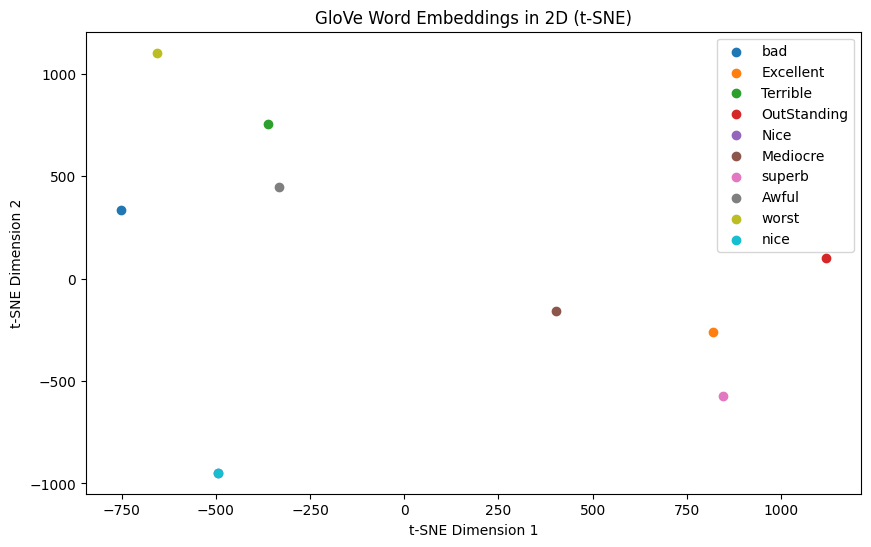

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=2, random_state=0)

word_embedding = np.array(word_embedding_array)

tsne_result = tsne.fit_transform(word_embedding)

plt.figure(figsize=(10, 6))

for i, word in enumerate(wordlist):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], label=word)

plt.title("GloVe Word Embeddings in 2D (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


#Cosine Similarity
Its commonly used for similarity score

In [22]:
def cosine_similarity_calc(word1, word2):
  sim = np.dot(word1, word2) / (np.linalg.norm(word1) * np.linalg.norm(word2))
  return sim

In [23]:
word1 = "drink"
word2 = "coffee"

print(f"Cosine similarity between '{word1}' and '{word2}' (100d): {cosine_similarity_calc(embeddings_index_100d[word1], embeddings_index_100d[word2])}")

Cosine similarity between 'drink' and 'coffee' (100d): 0.6990923881530762


In [24]:
import numpy as np
print("Indexing word vectors-300d.")

embeddings_index_300d = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index_300d[word] = coefs
f.close()

print(f"Found {len(embeddings_index_300d)} word vectors.")

Indexing word vectors-300d.
Found 400000 word vectors.


In [25]:
print(f"Cosine Similarity between {word1} and {word2} (300d):", cosine_similarity_calc(embeddings_index_300d[word1], embeddings_index_300d[word2]))

Cosine Similarity between drink and coffee (300d): 0.5402808


# Text Classsification

In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [53]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to download the missing resource

# Define stop words (common words like 'the', 'is', 'in', etc.)
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3. Tokenize text into individual words
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Return cleaned text (joined back into one string)
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:
import pandas as pd
# The previous cell downloaded the dataset to this path.
# The actual csv file is inside this directory.
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [55]:
data.shape

(50000, 2)

In [56]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [58]:
data['labels'] = [1 if sentiment == 'positive' else 0 for sentiment in data['sentiment']]
data

,review,sentiment,labels
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['labels'], test_size=0.2, random_state=42)

In [60]:
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [61]:
import re
def find_unique_words(preprocessed):
  word_list = []
  words = re.findall(r'\w', preprocessed)
  for word in words:
    if word not in word_list:
      word_list.append(word)
  return word_list

In [62]:
embedding_dim = 100
def paragraph_embedding(text):
  word_list = find_unique_words(text)
  num_tokens = len(word_list)
  embedding_matrix = np.zeros((num_tokens, embedding_dim))
  for i in range(0, len(word_list)):
    try:
      embedding_matrix[i] = embeddings_index_100d[word_list[i]]
    except:
      pass
  words_vecs = np.array(embedding_matrix)
  return words_vecs.mean(axis=0)

In [63]:
X_train = np.array([paragraph_embedding(text) for text in X_train])
X_test = np.array([paragraph_embedding(text) for text in X_test])

In [64]:
X_train[0]

array([-0.36429965,  0.47163152,  0.10557838,  0.05709664, -0.39976351,
        0.08635793,  0.44272441,  0.23066575, -0.57848945,  0.10082974,
        0.85071862, -0.55502253, -0.47619314,  0.38498027,  0.18619512,
       -0.12641601, -0.04880124,  0.15644327, -0.06616697,  0.26659762,
        0.61943732,  0.04586519,  0.15068045,  0.60290107,  0.20512094,
        0.58814759,  0.48925561,  0.08030961,  0.22733128, -0.2044328 ,
        0.33471306,  0.7377351 , -0.02454173,  0.29693017,  0.25247273,
        0.1852389 ,  0.50463071,  0.36653258,  0.10377655,  0.3384931 ,
        0.46248696, -0.6665491 ,  0.00964155, -0.53020524, -0.04038468,
        0.02727168, -0.55140607,  0.09304164,  0.09235955, -0.17733535,
       -0.11524297,  0.08202422,  0.25816427,  0.17156344, -0.55927117,
       -1.76404449, -0.19475027,  0.1437531 ,  1.08202421,  0.37041603,
       -0.4434809 , -0.20795797, -0.66829863, -0.24475748,  0.85334621,
        0.5132459 ,  0.30074624,  0.60032214,  0.39112658,  0.36

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.5637
Precision: 0.5643074581430746
Recall: 0.5886088509624926
F1 Score: 0.5762020398251578


In [67]:
text = "Finally, An India flim that actually delivers some great scares!"
pre_text = preprocess(text)
embedding = paragraph_embedding(pre_text)
clf.predict(embedding.reshape(1, -1))

array([1])